<h3 style="text-align:center; font-size:36px; color:black; font-weight:bold"> Default Credit Score Case</h3>
<h3 style="text-align:center; font-size:26px; color:black">Exploratory Data Analysis</h3>

---

Score credit card models compute the probability of default and are one of the main tools assessed by many companies to grant or deny credit. The objective of this analysis isto prepare the data to be used in a predictive model 

---

# 1. Importing libraries

In [1]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# 2. Univariate Descriptive Analysis

The database consist of a set of 11 variables, wherein, the variable called "Default" represents the varible target or dependent variable and the others are the independent variable.

A brief description of each variable or column are described in table bellow:

| Variable Long Name | Variable Short Name | Type | Description |
|---|---|---|---|
| Default | **Default** | Categorical | whether client is in default 1, otherwise 0 |
| Utilization of Insecure Credit Lines | **UIL** | Continuous | Credit Risk (0-1) |
| Age | **age** | Continuous | Client's age |
| Debt ratio | **RDW** | Continuous | Ratio between Debt and Assets |
| Monthly Wage | **MW** | Continuous | Monthly Wage |
| Default 30-59 | **NTD3059** | Categorical Ordinal | Number of times wherein the client was in default from 30 to 59 days |
| Default 60-89 | **NTD6090** | Categorical Ordinal | Number of times wherein the client was in default from 60 to 89 days |
| Default 90 | **NTDGT90** | Categorical Ordinal |Number of times wherein the client was in default greater or equal than 90 days |
| Numbers of loans | **NB** | Categorical Ordinal | Current number of real state loans |
| Number of dependents | **ND** | Categorical Ordinal | Current Number of dependents on income tax |
| Open Credit Lines | **OCL** | Categorical Ordinal | Number of open credit lines |

## 2.1. Reading the Data

In [2]:
# Reading file from disk
file = os.path.join('data','training_data.csv')
df = pd.read_csv(file)

# Proper Column Categorization
# In order to produce figures it is better to deal with ordinal data as categories
categorical = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df = df.assign(**{col: df[col].astype('category') for col in categorical})

df.head(5)

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2. Univariate Distributions and Outliers

### 2.2.1. Proportions of Nulls 

In [3]:
null_prop = df.isnull().mean()
pd.DataFrame(null_prop).transpose()

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,0.0,0.0,0.0,0.0,0.0,0.197845,0.0,0.0,0.0,0.0,0.026164


As we can see the variables MW (Monthly Wage) and ND (Number of Dependants) have the following proportion of nulls, 
20% and 3% respectively.

### 2.2.2. Continuous Variables

In [4]:
custom_quantiles = [ 0.05, 0.25, 0.75, 0.95, 0.99 ]
df_describe = df[['UIS','age','RDW','MW']].describe(percentiles=custom_quantiles)
df_describe.round(2)

,UIS,age,RDW,MW
count,110000.00,110000.00,110000.00,88237.00
mean,5.93,52.26,354.82,6637.41
std,252.30,14.77,2074.14,13383.95
min,0.00,0.00,0.00,0.00
5%,0.00,29.00,0.00,1300.00
25%,0.03,41.00,0.18,3400.00
50%,0.16,52.00,0.37,5400.00
75%,0.56,63.00,0.87,8225.00
95%,1.00,78.00,2464.05,14593.40
99%,1.09,87.00,5000.01,25000.00


Above a summary containing the main resume measurements of continuous variables is presented. Comparing the median to the mean, we can see that UIS, RDW and MW variables are skilled toward lower values due to the mean be significantly greater than the median, while the age has the mean and the median (50%) nearer each other.

Still in the above table, looking at the higher percentiles, for UIS column the 99th percentile is 1.00 while the maximum is a value above 50k, in this case it is evident the presence of outliers. For the variables or columns RDW and MW we can conclude the same while for MW (Monthly Wage) could be people that earns a salary above $300k per month. And finaly fot the age column, we observe that the minimum age is 0, so this is not an expected age, since the majority age in country BR is 18 years.

To deal with the **outliers**, we will use the following rule, if a cell value is above or equal to the 99th percentile, a null value will be assigned, otherwise it does not change, this rule will be applied to UIS, RDW and MW. For age the opposite rule will be applied, but for values less than 18 years.

In [5]:
# Dealing with outliers in continuous
cols = ['UIS','RDW','MW']
vals = [1,1,14593.40]
for col, val in zip(cols, vals):
    df.loc[df[col] >  val, col] = np.nan
df.loc[df['age'] < 18, 'age'] = np.nan

custom_quantiles = [ 0.05, 0.25, 0.75, 0.95, 0.99 ]
df[cols].describe(percentiles=custom_quantiles).round(2)

,UIS,RDW,MW
count,107548.00,84255.00,83825.00
mean,0.30,0.30,5668.03
std,0.34,0.23,3164.74
min,0.00,0.00,0.00
5%,0.00,0.00,1208.20
25%,0.03,0.13,3300.00
50%,0.15,0.27,5133.00
75%,0.52,0.44,7689.00
95%,1.00,0.74,11781.80
99%,1.00,0.94,13750.00


In table above, the summary of the continuous variables after the treatment is shown. Comparing to the previous one, we can see that the appointed variables still present the same pattern of assimetry toward low values, and the age still maintains it simetric pattern. But now with expected values.

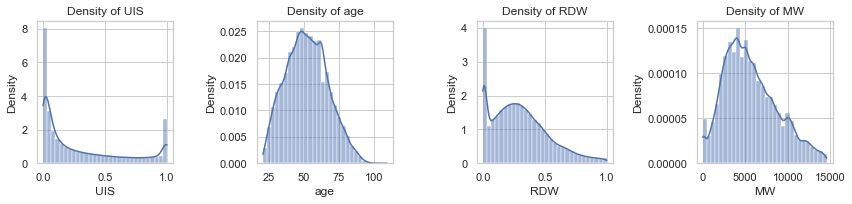

In [6]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols = ['UIS','age','RDW','MW']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    #sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    sns.histplot(data=df, x=col, stat="density", bins = 30, kde=True, ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Above, histograms showing the probability density function of continuous variables is depicted. As we can see the patterns analized previously remain the same. However, in the variable age we can see a slight assimetry toward lower values and even two modes. 


### 2.2.3. Ordinal Categorical Variables

In [7]:
categorical = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df[categorical].describe()

,NTD3059,NTD6089,NTDGT90,NB,ND,OCL
count,110000,110000,110000,110000,107122.0,110000
unique,15,13,18,28,12.0,57
top,0,0,0,0,0.0,6
freq,92469,104466,103836,41159,63652.0,9988


For ordinal categorical variables, we can see that for variables related to existence of default in n days (NTD...), the frequency of the top category is above 90%. For NB, ND and OCL, the distribution seems more equilibrated. Once, this variables are ordinal we can use histograms to see the individual distribution of each variable.

First, let's analyze the variables related to the existence of previous default (NTD3059, NTD6089 and NTDGT90).

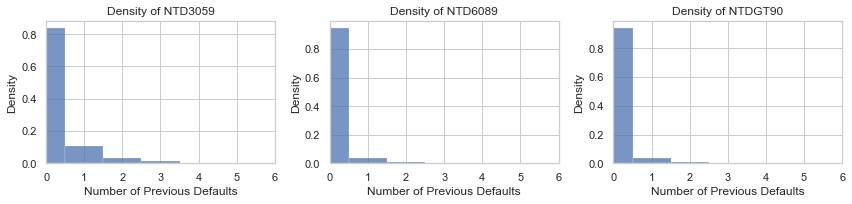

In [8]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols =['NTD3059', 'NTD6089', 'NTDGT90']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, stat="density", ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    axes[i].set_xlabel('Number of Previous Defaults')
    axes[i].set_xlim([0,6])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As we can see the expected values for this variables is values below 5 defaults. Values above this, can be considered as outliers for these kind of variables.

Now, let us examine the other ordinal variables.

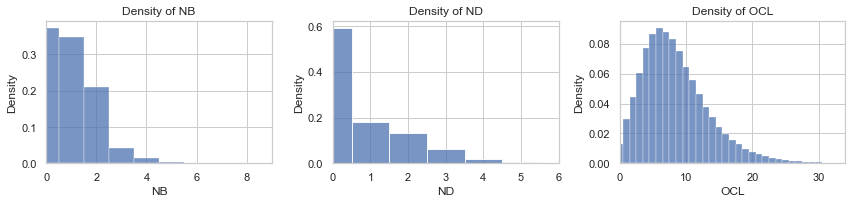

In [9]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols =['NB', 'ND', 'OCL']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col,  stat="density", ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    #axes[i].set_xlabel('Number of Previous Defaults')
    lims = [np.nanmin(np.array(df[col])), np.nanquantile(np.array(df[col]),0.999) ]
    axes[i].set_xlim(lims)
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As we can see the expected values for these variables are in general values bellow 8 counts for NB and ND and for OCL bellow 30, once these histograms were limited by their respective 99th quantile in x axis. 

So we will only retain the expected values, values above the thresholds indicated will be considered outliers and will be set to nan.

In [10]:
# Dealing with outliers in ordinal data
categorical = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df = df.assign(**{col: df[col].astype('float') for col in categorical})

vals = [4,4,4, 6,6,30]
for col, val in zip(categorical, vals):
    df.loc[df[col] >  val, col] = np.nan
df[categorical].describe()

,NTD3059,NTD6089,NTDGT90,NB,ND,OCL
count,109383.000000,109749.000000,109572.000000,109652.000000,107061.000000,109754.000000
mean,0.223874,0.061531,0.077392,0.993270,0.753505,8.384104
std,0.604783,0.303715,0.376206,1.006862,1.101631,4.969428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000,11.000000
max,4.000000,4.000000,4.000000,6.000000,6.000000,30.000000


## 2.3. Conclusion - Univariate Analysis

In [11]:
null_prop = df.isnull().mean()
pd.DataFrame(null_prop).transpose()

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,0.0,0.022291,0.000009,0.005609,0.234045,0.237955,0.002236,0.003891,0.003164,0.002282,0.026718


The table above shows the proportion of nulls in the data set per column, as we can see the greater proportion of null is in the column MW (Monthly Wage), representing about 20% of the rows.

All columns were analyzed and their respective probability density distribution were accessed as well. We can see that most of distribution do not follow a normal distribution, except the variable "age", so transformations such as log transformations can be applied in future analysis like regression analysis.

---

# 3. Multivariate Analysis

The multivariate analysis is divided into two kinds, target-features analysis and features-features analysis. In target-features analysis we will analyze the relationships between the target (Default) to the other variables and features-features the relationship two by two between features.

## 3.1. Target - Features

In [12]:
# Assign Categorical type to Default target
categorical = ['Default','NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df = df.assign(**{col: df[col].astype('float') for col in categorical})

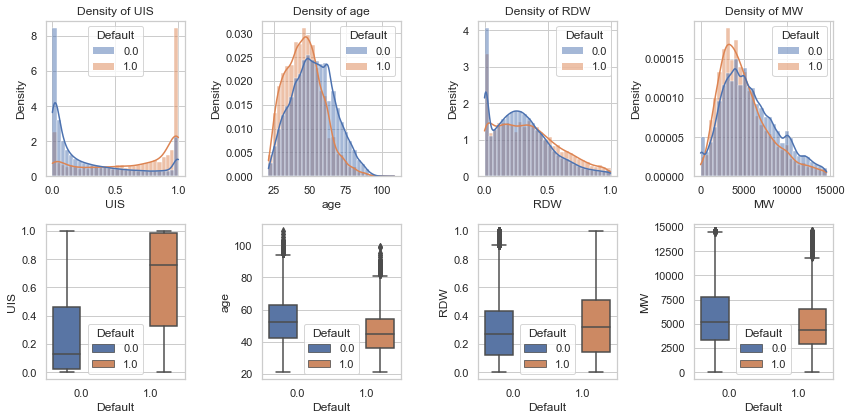

In [16]:
sns.set(style="whitegrid")
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols = ['UIS','age','RDW','MW']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    #sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    sns.histplot(data=df, x=col, hue ='Default', common_norm=False, stat="density", bins = 30, kde=True, ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    
    sns.boxplot(data=df,x='Default', y=col, hue = 'Default', ax=axes[i+4])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Above a figure showing the distribution (top pannel) of continuous variables of clients that is in default (1) and no default (0) are provided with a box plot (bottom pannel). We can see that for UIS and RDW, default clients tend to have higher values than non default clients, standing out the variable UIS where the diferences are more enhanced. For the age, and MW, we can see the opposite pattern, indicating that younger clients and clients earning lower wages tend to default more than older and higher wage clients. 

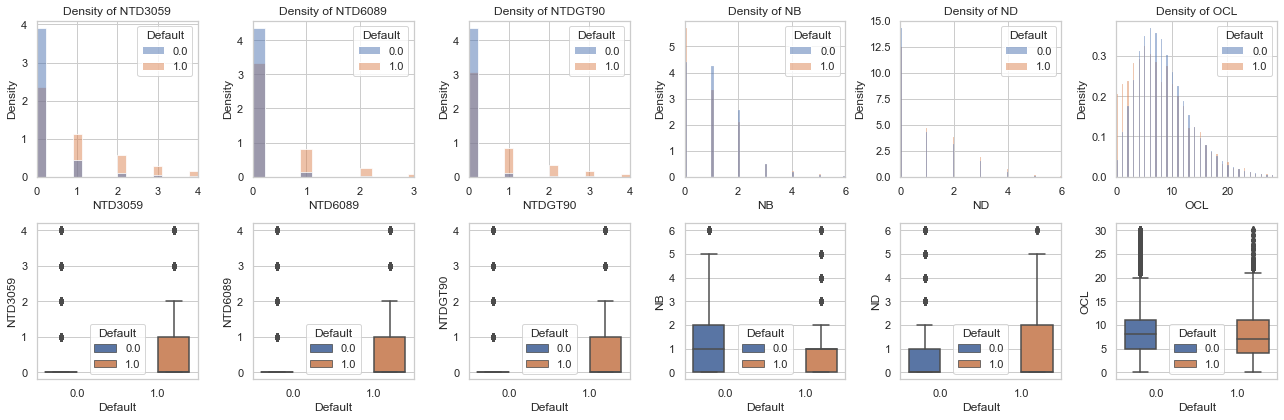

In [20]:
sns.set(style="whitegrid")
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 6))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    #sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    sns.histplot(data=df, x=col, hue ='Default', common_norm=False, stat="density", ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    lims = [np.nanmin(np.array(df[col])), np.nanquantile(np.array(df[col]),0.999) ]
    axes[i].set_xlim(lims)
    
    sns.boxplot(data=df,x='Default', y=col, hue = 'Default', ax=axes[i+6])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The pannel above represents the distribution of the ordinal variables for default and non default clients. We can see that the variables NB, ND and OCL do not distinguish well the target. However, the variables related to previous default present that clients who default previously have a greater tendency to default, but, still these variables do not distinguish well the target as we can see in their respective PDF distribution comparison, most of default clients do not default previously.

## 3.2. Features - Features

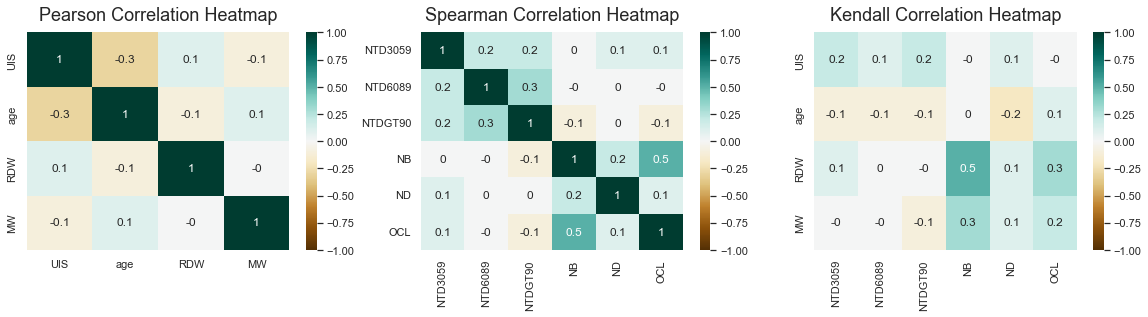

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
heatmap = sns.heatmap(df[['UIS','age','RDW','MW']].corr().round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax = axes[0])
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# Spearman Rank correlation
spearman = df[['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']].corr('spearman')
spm = sns.heatmap(spearman.round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax = axes[1])
spm.set_title('Spearman Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# Kendal's tau correlation
vrs = ['UIS','age','RDW','MW','NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
kend = df[vrs].corr('kendall')[0:4][['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']]
knd = sns.heatmap(kend.round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax = axes[2])
knd.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Correlation analysis is performed above, Pearson correlation for continuous-continuos pairs, Spearman rank correlation for ordinal-ordinal pairs and Kendall's tau correlation between ordinal-continuous pairs. No stronger correlation is found between the pairs analyzed, so we can assume independence among the variables.

## 3.3. Conclusion - Multivariate Analysis

Comparing the indepent variables or features to the dependent variable or target (Default), we found the following:

* For most of variables there is no a clear contrast between the default and non default clients, except for the variable UIS;
* Default clients tend to have more than one previous default;
* Default clients tend to be younger and earns less than non default clients.

And between the dependent variables or features, we found:

* Correlation analysis accounting the variables types were performed and there were not found stronger relationships among the pairs of dependent variables.

---

# 4 - Conclusion and Final Data Frame

## 4.1. Removing null rows and recording the final dataframe

In [108]:
df_final = df.dropna()
print('----------------------------------------------------')
print(f'Number of lines before removing nulls {len(df)}\nNumber of lines after removing nulls {len(df_final)}')
print(f'{round(1-len(df_final)/len(df),2)*100}% were removed')
print('----------------------------------------------------\n')

r1, r2 = round(df[['Default']].mean(),3), round(df_final[['Default']].mean(),3)
print('----------------------------------------------------')
print(f'Proportion of Defaults before removing nulls: {r1}')
print(f'Proportion of Defaults after removing nulls:  {r2}')
print('----------------------------------------------------\n')

----------------------------------------------------
Number of lines before removing nulls 110000
Number of lines after removing nulls 75904
31.0% were removed
----------------------------------------------------

----------------------------------------------------
Proportion of Defaults before removing nulls: Default    0.067
dtype: float64
Proportion of Defaults after removing nulls:  Default    0.058
dtype: float64
----------------------------------------------------



In [98]:
df_final.head(5).round(2)

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,1.0,0.77,45.0,2.0,0.80,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.96,40.0,0.0,0.12,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.66,38.0,1.0,0.09,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.23,30.0,0.0,0.04,3300.0,5.0,0.0,0.0,0.0,0.0
5,0.0,0.21,74.0,0.0,0.38,3500.0,3.0,0.0,1.0,0.0,1.0


In [111]:
ofile = os.path.join('data','processed_dataframe.csv')
try:
    df_final.to_csv(ofile, index=False)
    print(f'dataframe saved in {ofile}')
except:
    print(f'error in saving final dataframe, verify the path {ofile}')

dataframe saved in data\processed_dataframe.csv


---